## LOADS

In [1]:
import os
import csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.interpolate import make_interp_spline
import numpy as np

In [2]:

archive = "e2e_result_stats_under600.csv"
names = "e2e_names.csv"
groups= "e2e_RNA_Groups.csv"
lens = "e2e_lenghts.csv"

path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
stats_path = (path + "/saved_stats/" + archive)
names_path = (path +"/saved_stats/" + names)
lens_path = (path + "/saved_stats/" + lens)
groups_path = (path + "/saved_stats/" + groups)

list_bin_acc = []
list_bin_recall = []
list_bin_f = []
list_bin_prec = []
list_ex_acc = []
list_ex_recall = []
list_ex_f = []
list_ex_prec = []
list_ex_amm = []

with open(stats_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    data = list(csv_reader)

with open(names_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    names = list(csv_reader)

with open(lens_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    lens = list(csv_reader)

with open(groups_path, newline='') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    groups = list(csv_reader)

names = list(names[0][1:])
groups = list(groups[0][1:])
lens = list(map(float,lens[0][1:]))

elements = list(map(float,data[0][1:-1]))

list_bin_acc = list(map(float,data[1][1:]))
list_bin_recall = list(map(float,data[2][1:]))
list_bin_f = list(map(float,data[3][1:]))
list_bin_prec = list(map(float,data[4][1:]))

list_ex_acc = list(map(float,data[5][1:]))
list_ex_recall = list(map(float,data[6][1:]))
list_ex_f = list(map(float,data[7][1:]))
list_ex_prec = list(map(float,data[8][1:]))
list_ex_amm = list(map(float,data[9][1:]))
for i in range(len(list_ex_amm)):
    list_ex_amm[i] = list_ex_amm[i]/100

end_results = []

In [3]:
#Order the results by the groups of our database:
#list_something = [index in the result lists]

group_ids = ["5s", "16s", "23s", "srp", "grp", "tRNA", "tmRNA", "RNaseP"]

list_5s = []
list_16s = []
list_23s = []
list_srp = []
list_grp = []
list_TRNA = []
list_tmRNA = []
list_RNaseP = []
i = 0
while i < len(names):
    if groups[i] == "5s":      list_5s.append(i)
    if groups[i] == "16s":     list_16s.append(i)
    if groups[i] == "23s":     list_23s.append(i)
    if groups[i] == "srp":     list_srp.append(i)
    if groups[i] == "grp":     list_grp.append(i)
    if groups[i] == "tRNA":    list_TRNA.append(i)
    if groups[i] == "tmRNA":   list_tmRNA.append(i)
    if groups[i] == "RNaseP":  list_RNaseP.append(i)
    i = i + 1


## DATASET

3874



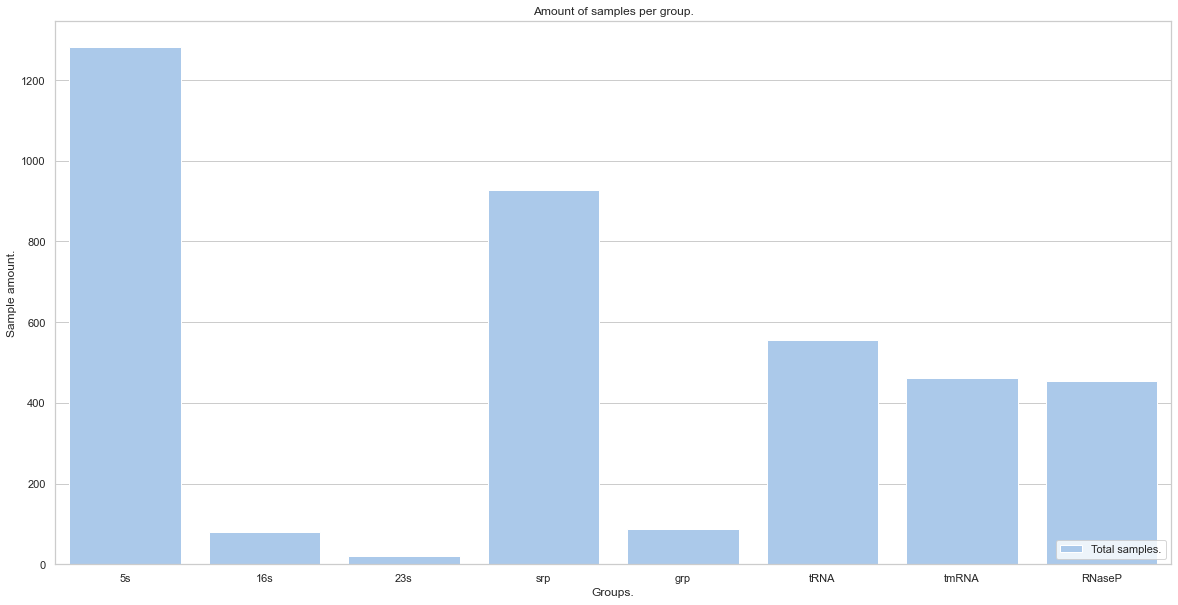

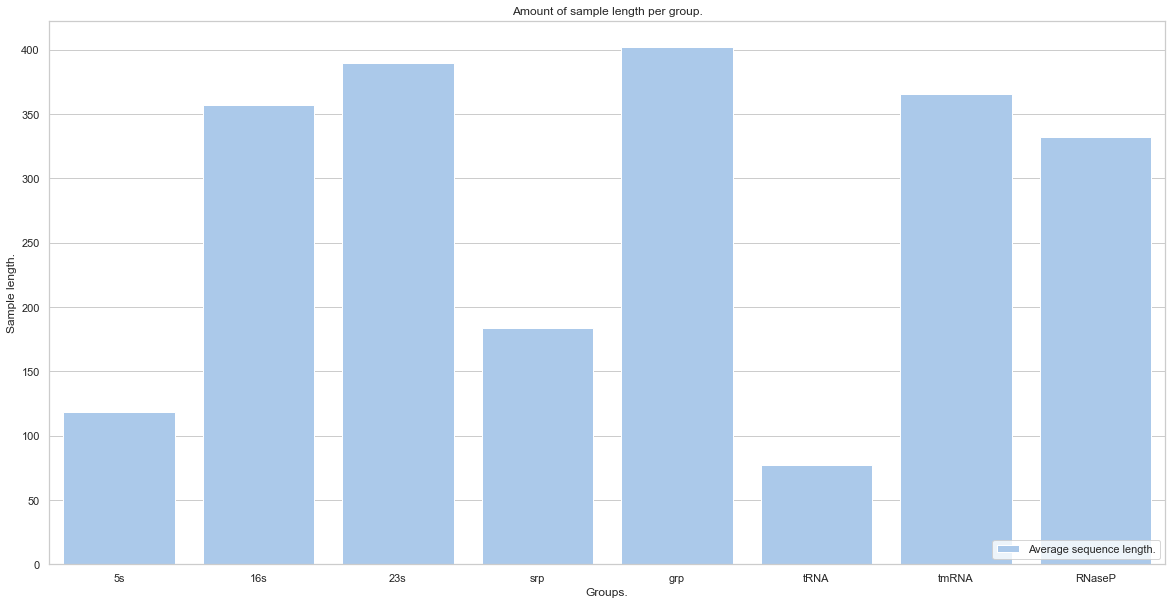

In [4]:
print(len(lens))

#Dataset distribution: 
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Plot the total for each
sns.set_color_codes("pastel")
sns.barplot( x=group_ids, y= list(map(len, [list_5s, list_16s, list_23s, list_srp, list_grp, list_TRNA, list_tmRNA, list_RNaseP])), label="Total samples.", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_title("Amount of samples per group.")
ax.set(xlabel="Groups.", ylabel="Sample amount.") 

# Average length for each group:
def avLenIndList(list):
    sum = 0
    for i in list:
        sum = sum + lens[i]
    return (sum/len(list))

sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Plot the total for each
sns.set_color_codes("pastel")
sns.barplot( x=group_ids, y= list(map(avLenIndList, [list_5s, list_16s, list_23s, list_srp, list_grp, list_TRNA, list_tmRNA, list_RNaseP])), label="Average sequence length.", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_title("Amount of sample length per group.")
ax.set(xlabel="Groups.", ylabel="Sample length.") 


print()


## 5s


In [5]:
## 5S analisys (E2E)
auxList = list_5s
auxName = "5s"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]


get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_5s = sorted_get_ex_acc


In [6]:
auxName = "5s"

print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))




Average 5s length =  118.71395167575994
Average 5s binary accuracy =  0.962639886574312
Average 5s binary recall =  0.9605163297863687
Average 5s binary f1 score =  0.9618642260017682
Average 5s binary precision =  0.9808692893044628
Average 5s exact match rate =  0.9528399475696137
Average 5s exact accuracy =  0.9605163297863687
Average 5s exact recall =  0.9605163297863687
Average 5s exact f1 score =  0.9605163297863687
Average 5s exact precision =  0.9605163297863687


## 16s

In [7]:
## 16s analisys 
auxList = list_16s
auxName = "16s"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_16 = sorted_get_ex_acc



In [8]:
print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))


Average 16s length =  357.1111111111111
Average 16s binary accuracy =  0.5422631491501544
Average 16s binary recall =  0.5226414925141241
Average 16s binary f1 score =  0.3897866866117267
Average 16s binary precision =  0.6062421138273945
Average 16s exact match rate =  0.43299603538319953
Average 16s exact accuracy =  0.5226414925141241
Average 16s exact recall =  0.5226414925141241
Average 16s exact f1 score =  0.5226414925141241
Average 16s exact precision =  0.5226414925141241


## 23s

In [9]:
## 23s analisys 
auxList = list_23s
auxName = "23s"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_23 = sorted_get_ex_acc


In [10]:
print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))

Average 23s length =  389.76190476190476
Average 23s binary accuracy =  0.49615301656403604
Average 23s binary recall =  0.47268631565840924
Average 23s binary f1 score =  0.37759286849674545
Average 23s binary precision =  0.5869726956767265
Average 23s exact match rate =  0.35529527214260426
Average 23s exact accuracy =  0.47268631565840924
Average 23s exact recall =  0.47268631565840924
Average 23s exact f1 score =  0.47268631565840924
Average 23s exact precision =  0.47268631565840924


## Srp

In [11]:
## srp analisys 
auxList = list_srp
auxName = "Srp"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_srp = sorted_get_ex_acc

In [12]:
print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))


Average Srp length =  183.94504310344828
Average Srp binary accuracy =  0.5663619537408032
Average Srp binary recall =  0.5296361120403484
Average Srp binary f1 score =  0.503647659482333
Average Srp binary precision =  0.6936842071536033
Average Srp exact match rate =  0.4121797419629459
Average Srp exact accuracy =  0.5296361120403484
Average Srp exact recall =  0.5296361120403484
Average Srp exact f1 score =  0.5296361120403484
Average Srp exact precision =  0.5296361120403484


## GRP

In [13]:
## grp analisys 
auxList = list_grp
auxName = "Grp"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_grp = sorted_get_ex_acc

In [14]:
print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))


Average Grp length =  402.4886363636364
Average Grp binary accuracy =  0.5519309467032311
Average Grp binary recall =  0.5327949587906712
Average Grp binary f1 score =  0.40055814541693363
Average Grp binary precision =  0.6129200353664733
Average Grp exact match rate =  0.4503020575925649
Average Grp exact accuracy =  0.5327949587906712
Average Grp exact recall =  0.5327949587906712
Average Grp exact f1 score =  0.5327949587906712
Average Grp exact precision =  0.5327949587906712


## TRNA

In [15]:
## TRNA analisys 
auxList = list_TRNA
auxName = "TRNA"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_TRNA = sorted_get_ex_acc

In [16]:
print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))


Average TRNA length =  77.10233393177738
Average TRNA binary accuracy =  0.9397837868440846
Average TRNA binary recall =  0.9364686153971465
Average TRNA binary f1 score =  0.9329532974529012
Average TRNA binary precision =  0.9461510626333992
Average TRNA exact match rate =  0.9237303462688226
Average TRNA exact accuracy =  0.9364686153971465
Average TRNA exact recall =  0.9364686153971465
Average TRNA exact f1 score =  0.9364686153971465
Average TRNA exact precision =  0.9364686153971465


## TMRNA

In [17]:
## TmRNA analisys 
auxList = list_tmRNA
auxName = "tmRNA"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_TMRNA = sorted_get_ex_acc



In [18]:
print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))


Average tmRNA length =  366.0151515151515
Average tmRNA binary accuracy =  0.6571048703561689
Average tmRNA binary recall =  0.6423563743228551
Average tmRNA binary f1 score =  0.5688693493102279
Average tmRNA binary precision =  0.8208043221297885
Average tmRNA exact match rate =  0.589998731984871
Average tmRNA exact accuracy =  0.6423563743228551
Average tmRNA exact recall =  0.6423563743228551
Average tmRNA exact f1 score =  0.6423563743228551
Average tmRNA exact precision =  0.6423563743228551


## RNaseP

In [19]:
## RNaseP analisys 
auxList = list_RNaseP
auxName = "RNaseP"

get_lens            =   [lens[index]            for index in auxList]
get_bin_acc         =   [list_bin_acc[index]    for index in auxList]
get_bin_recall      =   [list_bin_recall[index] for index in auxList]
get_bin_f           =   [list_bin_f[index]      for index in auxList]
get_bin_precision   =   [list_bin_prec[index]   for index in auxList]

sorted_get_bin_acc         =   [x for y, x in sorted(zip(get_lens,       get_bin_acc))]
sorted_get_bin_recall      =   [x for y, x in sorted(zip(get_lens,    get_bin_recall))]
sorted_get_bin_f           =   [x for y, x in sorted(zip(get_lens,         get_bin_f))]
sorted_get_bin_precision   =   [x for y, x in sorted(zip(get_lens, get_bin_precision))]

get_ex_acc          =   [list_ex_acc[index]     for index in auxList]
get_ex_recall       =   [list_ex_recall[index]  for index in auxList]
get_ex_f            =   [list_ex_f[index]       for index in auxList]
get_ex_prec         =   [list_ex_prec[index]    for index in auxList]
get_ex_amm          =   [list_ex_amm[index]     for index in auxList]

sorted_get_ex_acc          =   [x for _, x in sorted(zip(get_lens,        get_ex_acc))]
sorted_get_ex_recall       =   [x for _, x in sorted(zip(get_lens,     get_ex_recall))]
sorted_get_ex_f            =   [x for _, x in sorted(zip(get_lens,          get_ex_f))]
sorted_get_ex_prec         =   [x for _, x in sorted(zip(get_lens,       get_ex_prec))]
sorted_get_ex_amm          =   [x for _, x in sorted(zip(get_lens,        get_ex_amm))]
sorted_get_ex_acc_rnasep = sorted_get_ex_acc

In [20]:
print ("Average " + auxName + " length = ", sum(get_lens)/len(get_lens))
print ("Average " + auxName + " binary accuracy = ", sum(get_bin_acc)/len(get_bin_acc))
print ("Average " + auxName + " binary recall = ", sum(get_bin_recall)/len(get_bin_recall))
print ("Average " + auxName + " binary f1 score = ", sum(get_bin_f)/len(get_bin_f))
print ("Average " + auxName + " binary precision = ", sum(get_bin_precision)/len(get_bin_precision))

print ("Average " + auxName + " exact match rate = ", sum(get_ex_amm)/len(get_ex_amm))
print ("Average " + auxName + " exact accuracy = ", sum(get_ex_acc)/len(get_ex_acc))
print ("Average " + auxName + " exact recall = ", sum(get_ex_recall)/len(get_ex_recall))
print ("Average " + auxName + " exact f1 score = ", sum(get_ex_f)/len(get_ex_f))
print ("Average " + auxName + " exact precision = ", sum(get_ex_prec)/len(sorted_get_ex_prec))


Average RNaseP length =  332.1563876651982
Average RNaseP binary accuracy =  0.5383373331099679
Average RNaseP binary recall =  0.5250187595604323
Average RNaseP binary f1 score =  0.4439213833717283
Average RNaseP binary precision =  0.6699167301161365
Average RNaseP exact match rate =  0.4246967904674266
Average RNaseP exact accuracy =  0.5250187595604323
Average RNaseP exact recall =  0.5250187595604323
Average RNaseP exact f1 score =  0.5250187595604323
Average RNaseP exact precision =  0.5250187595604323


## End stats:

In [21]:
list(zip(get_ex_acc,        get_lens))

[(0.48467966573816157, 359.0),
 (0.5852090032154341, 311.0),
 (0.5866666666666667, 300.0),
 (0.5830508474576271, 295.0),
 (0.5687022900763359, 262.0),
 (0.5658536585365853, 205.0),
 (0.5543766578249337, 377.0),
 (0.5543175487465181, 359.0),
 (0.49137931034482757, 348.0),
 (0.6598639455782312, 294.0),
 (0.6292517006802721, 294.0),
 (0.6156462585034014, 294.0),
 (0.5818965517241379, 232.0),
 (0.5328947368421053, 304.0),
 (0.45054945054945056, 364.0),
 (0.44110275689223055, 399.0),
 (0.6802721088435374, 294.0),
 (0.6666666666666666, 294.0),
 (0.45135135135135135, 370.0),
 (0.6146788990825688, 327.0),
 (0.6081504702194357, 319.0),
 (0.6360544217687075, 294.0),
 (0.4459016393442623, 305.0),
 (0.5244299674267101, 307.0),
 (0.5882352941176471, 238.0),
 (0.49744897959183676, 392.0),
 (0.5629370629370629, 286.0),
 (0.44857142857142857, 350.0),
 (0.45, 340.0),
 (0.5118343195266272, 338.0),
 (0.5207100591715976, 338.0),
 (0.5207100591715976, 338.0),
 (0.501628664495114, 307.0),
 (0.47129909365558

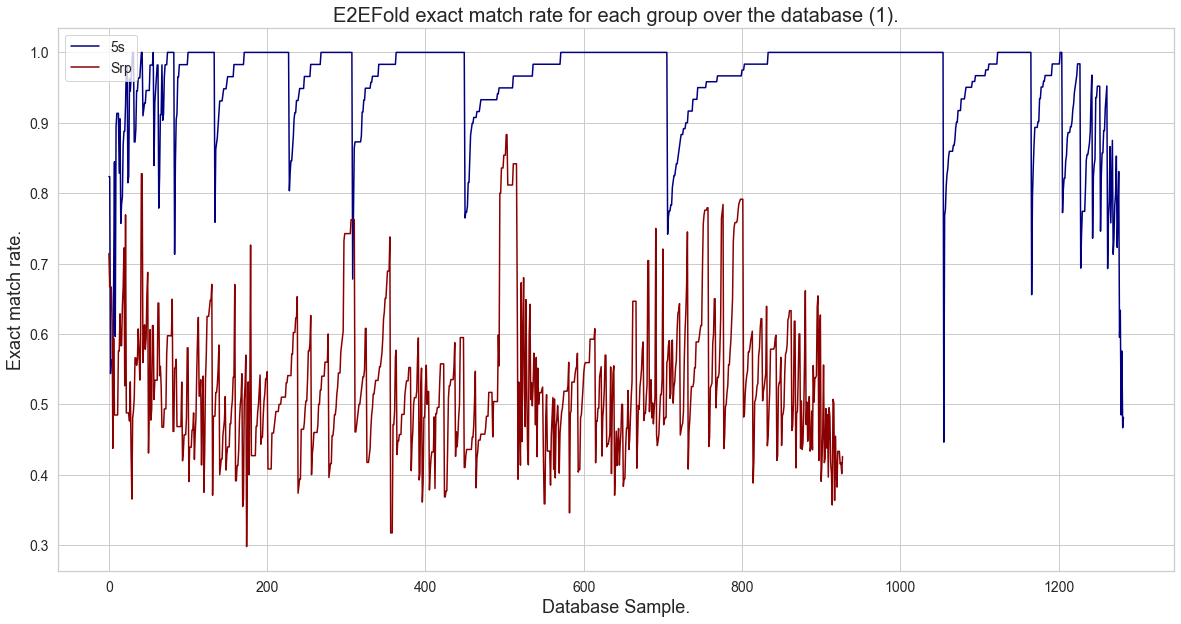

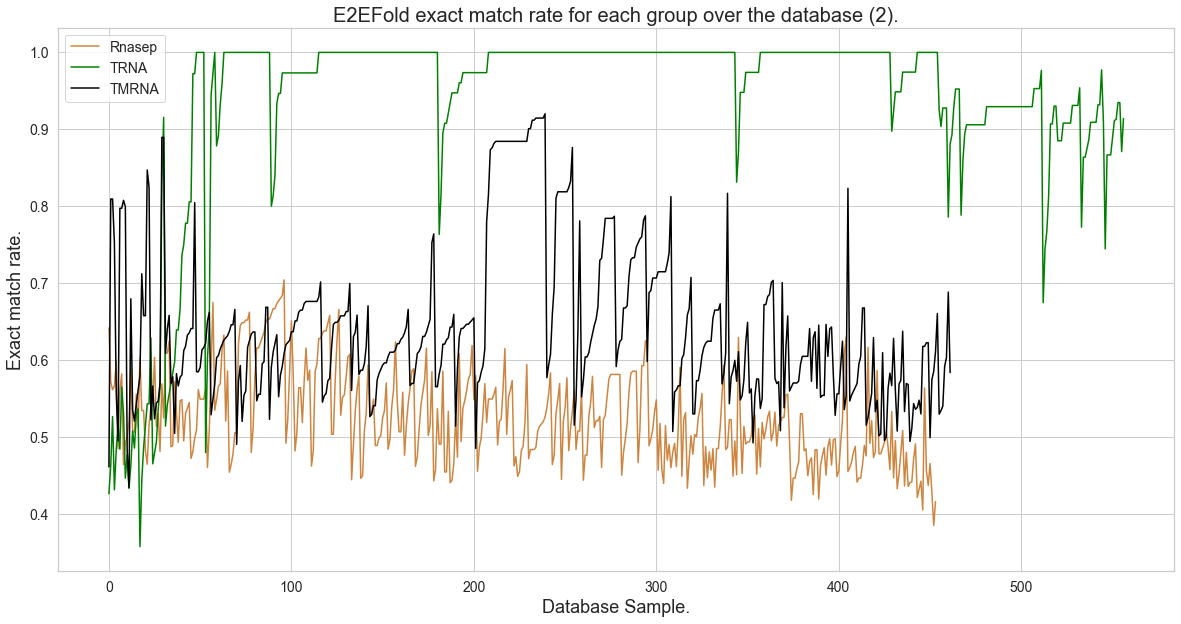

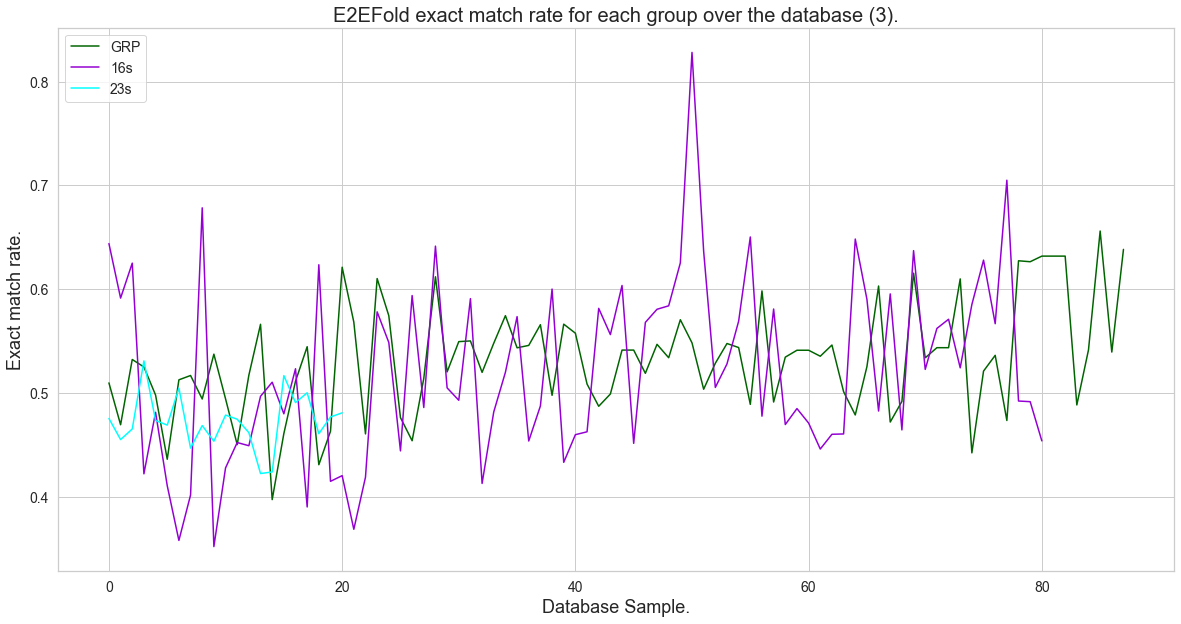

In [22]:
f, ax = plt.subplots(figsize=(20, 10))

ax.plot(sorted_get_ex_acc_5s, label='5s', color="navy")
ax.plot(sorted_get_ex_acc_srp, label='Srp',color="darkred")
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend()
plt.xlabel("Database Sample.", fontsize=18)
plt.ylabel("Exact match rate.", fontsize=18)
plt.title("E2EFold exact match rate for each group over the database (1).", fontsize=20)
plt.legend(loc=2, prop={'size': 14})
plt.show()


f, ax = plt.subplots(figsize=(20, 10))
ax.plot(sorted_get_ex_acc_rnasep, label='Rnasep', color="peru")
ax.plot(sorted_get_ex_acc_TRNA, label='TRNA', color="green")
ax.plot(sorted_get_ex_acc_TMRNA, label='TMRNA', color="black")
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend()
plt.xlabel("Database Sample.", fontsize=18)
plt.ylabel("Exact match rate.", fontsize=18)
plt.title("E2EFold exact match rate for each group over the database (2).", fontsize=20)
plt.legend(loc=2, prop={'size': 14})
plt.show()


f, ax = plt.subplots(figsize=(20, 10))
ax.plot(sorted_get_ex_acc_grp, label='GRP', color="darkgreen")
ax.plot(sorted_get_ex_acc_16, label='16s',color="darkviolet")
ax.plot(sorted_get_ex_acc_23, label='23s', color="aqua")
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend()
plt.xlabel("Database Sample.", fontsize=18)
plt.ylabel("Exact match rate.", fontsize=18)
plt.title("E2EFold exact match rate for each group over the database (3).", fontsize=20)
plt.legend(loc=2, prop={'size': 14})
plt.show()



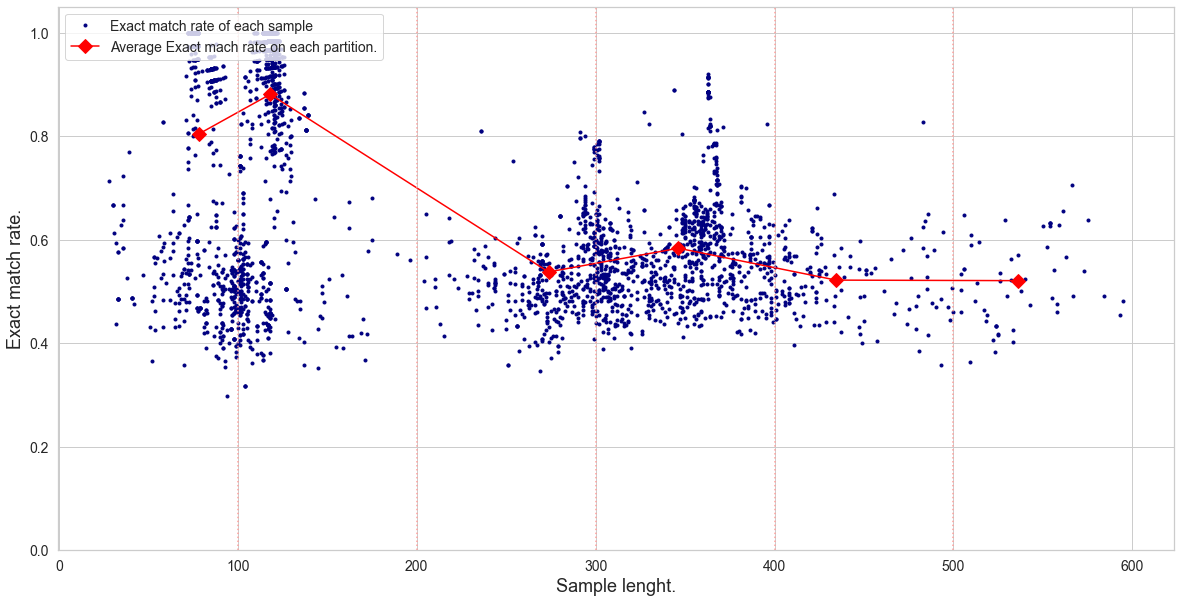

In [23]:
sorted_all_ex_acc          =   [x for _, x in sorted(zip(lens,        list_ex_acc))]

cont = 0
hundred  =0
hundred2 =0
hundred3 =0
hundred4 =0
hundred5 =0
for i in sorted(lens):
    if i >= 100 and hundred == 0:
        hundred = cont
    if i >= 200 and hundred2 == 0:
        hundred2 = cont
    if i >= 300 and hundred3 == 0:
        hundred3 = cont
    if i >= 400 and hundred4 == 0:
        hundred4 = cont
    if i >= 500 and hundred5 == 0:
        hundred5 = cont
    cont = cont + 1

average_list_ex = [ np.average(sorted_all_ex_acc[:hundred]),
                    np.average(sorted_all_ex_acc[hundred:hundred2]),
                    np.average(sorted_all_ex_acc[hundred2:hundred3]),
                    np.average(sorted_all_ex_acc[hundred3:hundred4]),
                    np.average(sorted_all_ex_acc[hundred4:hundred5]),
                    np.average(sorted_all_ex_acc[hundred5:])
                    ]
average_list_len = [np.average(list(sorted(lens))[:hundred]),
                    np.average(list(sorted(lens))[hundred:hundred2]),
                    np.average(list(sorted(lens))[hundred2:hundred3]),
                    np.average(list(sorted(lens))[hundred3:hundred4]),
                    np.average(list(sorted(lens))[hundred4:hundred5]),
                    np.average(list(sorted(lens))[hundred5:])
                    ]

f, ax = plt.subplots(figsize=(20, 10))

ax.plot(sorted(lens), sorted_all_ex_acc, label='Exact match rate of each sample', color="navy", marker=".", linestyle="")
ax.plot(average_list_len, average_list_ex, color="red", marker="D", linestyle="-", markersize=10, label = "Average Exact mach rate on each partition.")
ax.plot()
plt.axvline(x=100, linestyle=":", color="r")
plt.axvline(x=200, linestyle=":", color="r")
plt.axvline(x=300, linestyle=":", color="r")
plt.axvline(x=400, linestyle=":", color="r")
plt.axvline(x=500, linestyle=":", color="r")
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend()
plt.ylim(0, 1.05)
plt.xlabel("Sample lenght.", fontsize=18)
plt.ylabel("Exact match rate.", fontsize=18)
plt.legend(loc=2, prop={'size': 14})
plt.show()